In [1]:
import itchat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import jieba
import re
from wordcloud import WordCloud, ImageColorGenerator
import PIL.Image as Image
%matplotlib inline
# -*- coding:utf-8 -*-


In [2]:
# font setup
from matplotlib import font_manager
fontP = font_manager.FontProperties(fname = '/Library/Fonts/SimHei.ttf')
#fontP.set_family()
#fontP.set_size(14)
#plt.legend(prop=fontP)
#plt.show()

#ChineseFont1 = FontProperties(fname = '/Library/Fonts/SimHei.ttf')

In [3]:
#login callback and exit callback
def lc():
    print("login succeed!")

def ec():
    print("logout succeed!")

In [4]:
#login with QR code scan
#itchat.auto_login()

In [5]:
# desplaying QR code in the command prompt
itchat.auto_login(enableCmdQR=-2, hotReload=True, loginCallback=lc, exitCallback=ec)

Getting uuid of QR code.


                                                                              
  ██████████████    ██  ██  ████      ████  ██    ██  ██      ██████████████  
  ██          ██    ██  ██████          ██  ████    ██        ██          ██  
  ██  ██████  ██  ████████      ████  ████████      ██  ████  ██  ██████  ██  
  ██  ██████  ██  ██  ████    ████  ██    ██████    ████████  ██  ██████  ██  
  ██  ██████  ██    ██  ████      ██  ████    ████  ████      ██  ██████  ██  
  ██          ██      ██      ████  ██  ████    ██    ██      ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                    ██    ██████████        ██    ████  ████                  
        ████  ████  ██████              ██    ████                  ████      
    ████    ██  ██████        ████  ██    ██████  ████  ████████████    ██    
    ████    ████  ██    ████  ██            ████  ████  ████████          ██  
    ████  ████  ██  ██████  ██    ██    ██  ██  ████

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.


login succeed!


In [6]:
#sending message to filehelper
itchat.send("test", toUserName='filehelper')

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': '请求成功'}, 'LocalID': '15027328159932', 'MsgID': '380486958234860818'}>

In [7]:
#setup auto reply to all new messages
#@itchat.msg_register(itchat.content.TEXT)
#def text_reply(msg):
#    return ("auto reply")#msg['Text']

#itchat.auto_login()
#itchat.run()

In [9]:
friends = itchat.get_friends(update=True)

In [10]:
friends

<ContactList: [<User: {'RemarkPYInitial': '', 'Sex': 1, 'RemarkPYQuanPin': '', 'Signature': 'ｓｕｍｍｅｒ ｉｓ ｎｏｗｈｅｒ ｔｏ ｂｅ ｆｏｕｎｄ◕‿◕\ufeff', 'ContactFlag': 1, 'PYQuanPin': 'ajiea', 'SnsFlag': 177, 'KeyWord': '', 'Statues': 0, 'MemberCount': 0, 'NickName': '阿杰啊', 'Province': '', 'RemarkName': '', 'IsOwner': 0, 'AppAccountFlag': 0, 'HeadImgUrl': '/cgi-bin/mmwebwx-bin/webwxgeticon?seq=622913786&username=@7ecb64df1cdfee10d8b9806ec2e8e404f41650c3726ca651e1ce18987834ce21&skey=@crypt_72e3f791_65b0afc186270c7656a536aeec294ca8', 'Uin': 2853916142, 'Alias': '', 'AttrStatus': 101027873, 'UserName': '@7ecb64df1cdfee10d8b9806ec2e8e404f41650c3726ca651e1ce18987834ce21', 'PYInitial': 'AJA', 'DisplayName': '', 'UniFriend': 0, 'ChatRoomId': 0, 'VerifyFlag': 0, 'StarFriend': 0, 'HeadImgFlag': 1, 'City': '', 'MemberList': <ContactList: []>, 'WebWxPluginSwitch': 0, 'HideInputBarFlag': 0, 'OwnerUin': 0, 'EncryChatRoomId': ''}>, <User: {'Sex': 2, 'RemarkPYQuanPin': 'xiongge', 'Signature': '"We choose to go to the mo

### sex ratio of your friends

male: 0.43902439024390244 36
female:0.4268292682926829 35
other: 0.13414634146341464 11


([<matplotlib.axis.XTick at 0x109ad34e0>,
 <a list of 3 Text xticklabel objects>)

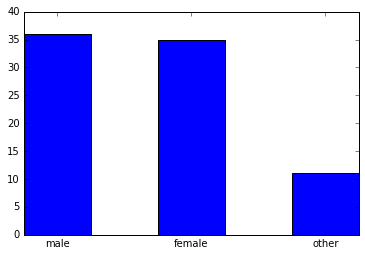

In [11]:
#male = 1
#female = 2
total = len(friends) - 1

male = female = other = 0
for i in friends[1:]:
    if i["Sex"] == 1:
        male +=1
    elif i["Sex"] == 2:
        female += 1
    else:
        other += 1
print("male: " + str(male/total) + " " + str(male) + "\nfemale:" + str(female/total) + " " + str(female) + "\nother: " + str(other/total) + " " + str(other))
genres = ("male", "female", "other")
genderNumbers = [male, female, other]

bar_width = 0.5
index = np.array([1, 2, 3])
plt.bar(index, genderNumbers, width=bar_width)
plt.xticks(index + bar_width / 2, genres)


### Demographics

In [12]:
#define getVar()
def getVar(var):
    variables = []
    for i in friends:
        variables.append(i[var])
    return(variables)
nickName = getVar("NickName")
signature = getVar("Signature")
province = getVar("Province")
city = getVar("City")
sex = getVar("Sex")
data = {"nickName":nickName, "sex": sex, "signature":signature, "province":province, "city": city}
df = pd.DataFrame(data)
df = df[["nickName", "sex", "province", "city", "signature"]]
df

In [14]:
df.province.unique()

array(['', '上海', '湖北', 'England', 'Massachusetts', 'Sha Tin', '广东', '云南',
       'Georgia', '四川', '江苏', '贵州', 'SanDiego', 'Milano', 'New York',
       'Leipzig', 'Pennsylvania', 'California'], dtype=object)

In [15]:
demographics = df.groupby(['province', "city"]).size().sort_values(ascending = False)
demographicsCity = df.groupby(["city"]).size().sort_values(ascending = False)
demographicsProvince = df.groupby(['province']).size().sort_values(ascending = False)

In [16]:
demographicsCity

city
                     34
武汉                   25
广州                    6
成都                    2
Sheffield             1
Atlanta               1
Carlsbad              1
Los Angeles City      1
New York City         1
Philadelphia City     1
Rochester City        1
贵阳                    1
Waltham City          1
苏州                    1
安顺                    1
宝山                    1
昆明                    1
浦东新区                  1
深圳                    1
南京                    1
dtype: int64

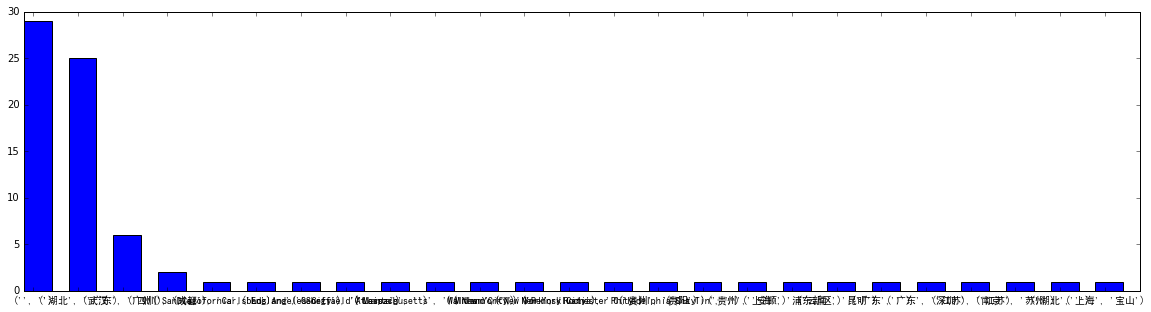

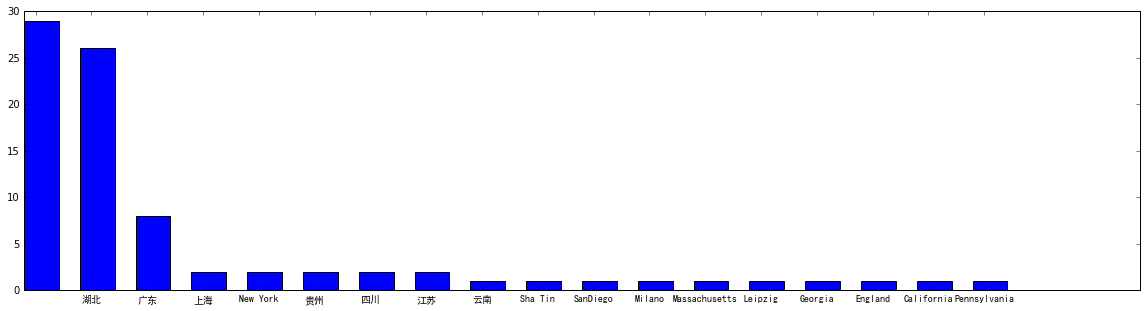

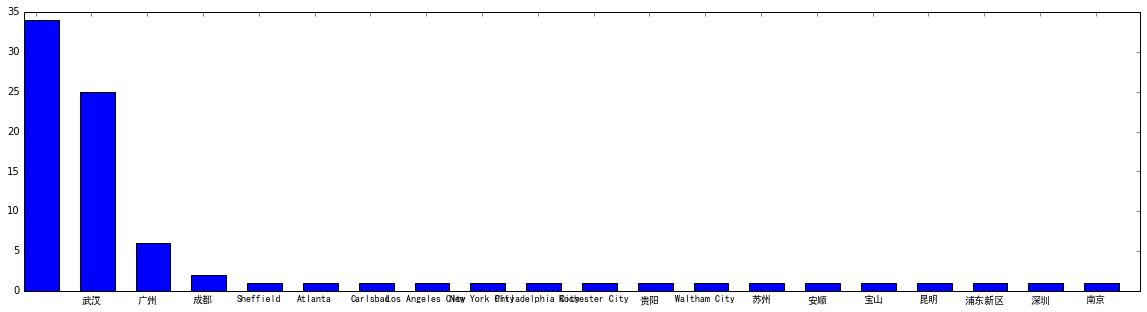

In [17]:
def plotBar(data):
    index = np.array(range(data.size)) * 0.8
    plt.figure(figsize=(20, 5))
    plt.bar(index, data, width=bar_width)
    plt.xticks(index + bar_width / 3, data.index, fontproperties = fontP)
plotBar(demographics)
plotBar(demographicsProvince)
plotBar(demographicsCity)

### 云词图 

In [19]:
#first  filter out emojis and special caracters

siglist = []
for i in friends:
    signature = i["Signature"].strip().replace("span", "").replace("class", "").replace("emoji", "")
    rep = re.compile("1f\d+\w*|[<>/=]")
    signature = rep.sub("", signature)
    siglist.append(signature)
text = "".join(siglist)
text

'ｓｕｍｍｅｒ ｉｓ ｎｏｗｈｅｒ ｔｏ ｂｅ ｆｏｕｎｄ◕‿◕\ufeff"We choose to go to the moon. "少说多做...GameRefineryIt\'s super awkward.好友已满，会随机删掉部分好友！如果误删一定要把我加回来哦！这世上一半人的快乐，另一半人永远不懂。药妆 护肤 彩妆 健康食品 " "带着猪狂奔闲谈莫论人非，静坐常思己过la xi la so我在…挖哥Carpe diem, 最迷人的不在远方，就在此刻能力有限，努力无限！笑点有点低Believe in yourself.too young too smart但教方寸无诸恶，狼虎丛中也立身.梦想是环游世界严以律己，宽以待人。The perception of reality becomes reality明野蛮生长   向死而生怕什么真理无穷，进一寸有进一寸的欢喜。日积跬步cibo芝士即力量由此及彼 由表及里 你中有我 我中有你🐼🐼🐼madness...GO AND BE FREE    不可再生的一切都值得珍惜港澳团签过关,景点门票，广州到香港快车，机票酒店 020-39750329Ｏrz念念不忘，必有回响。详细的功能可以见github仓库wiki页。per audacia ad astra(⁎⁍̴̛ᴗ⁍̴̛⁎)If I am going to do it I will do it my way.只是喜欢被你喜欢的感觉，而不是喜欢你.AWESOME GENIUS过气网红 " "To infinity and beyond.潜水王  " "一命二运三风水四积阴德五读书carpe diem，memento mori实在抱歉小量这个号已经满了，请您加qbitbot2入群，笔芯～只想发财人生全靠自己成全同化里都是骗人的永遠是一段很長的距離Love，Live，Leave可爱又迷棱的反派角色'

In [20]:
wordlist = jieba.cut(text, cut_all = True)
word_space_split=" ".join(wordlist)


#seg_list = jieba.cut("他来到了网易杭研大厦")  # 默认是精确模式
#print(", ".join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/zq/bjqy43y14_dgx166vhc4n0yw0000gn/T/jieba.cache
Loading model cost 1.099 seconds.
Prefix dict has been built succesfully.


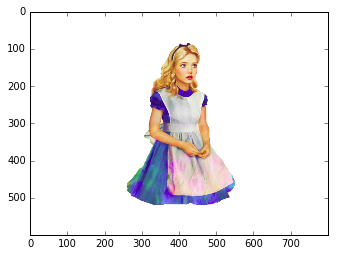

In [24]:
im = np.array(Image.open('pic.png'))

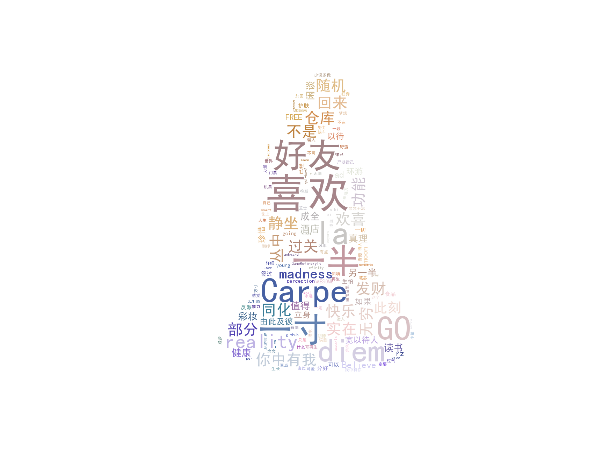

In [25]:
#coloring = np.array(Image.open("vap.png"))
coloring = im
wordCloud = WordCloud(background_color="white", max_words = 2000, mask=coloring, max_font_size=60, random_state=42, scale=2, font_path = "/Library/Fonts/SimHei.ttf").generate(word_space_split)

image_colors=ImageColorGenerator(coloring)
plt.figure(figsize=(10, 10))
plt.imshow(wordCloud.recolor(color_func=image_colors))
plt.imshow(wordCloud)
plt.axis("off")
plt.show()

In [26]:
# send pic to friends
itchat.send("hahaha", toUserName='filehelper')
itchat.send_image("wordcloud.png", toUserName="filehelper")


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': '请求成功'}, 'LocalID': '15027328212616', 'MsgID': '2226645036165562631'}>

In [27]:
itchat.send("@img@%s" % "wordcloud.png", "[WECHATID]")
itchat.send("@img@%s" % "wordcloud.png", "[WECHATID]")


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '', 'Ret': -1, 'RawMsg': ''}, 'LocalID': '', 'MsgID': ''}>

In [28]:
itchat.send("hahaha", toUserName='zhaoshijie1992')
itchat.send("@img@%s" % "wordcloud.png")
itchat.send_image("wordcloud.png", toUserName="zhaoshijie1992")

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '', 'Ret': -1, 'RawMsg': ''}, 'LocalID': '', 'MsgID': ''}>

In [29]:
itchat.logout()

logout succeed!


<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>